# Πως θα κατεβάσουμε χρηματοοικονομικά δεδομένα απο το διαδίκτυο

Υπάρχουν διάφοροι τρόποι, εδω θα χρησιμοποιήσουμε το pandas

Πρέπει να εγκαταστήσουμε pandas data



In [ ]:
#Versions needed 

#pip install --force-reinstall numpy==1.21.5
#pip install yfinance
#pip install seaborn==0.11.2
#pip install pandas==1.5.3


In [54]:
#pd.__version__

'1.5.3'

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from pandas_datareader import wb  
import datetime as dt
# from pandas_datareader import data
import pandas_datareader.data as dtr
# The yfinance is one of the famous modules in Python, which is used to collect online data, 
# and with it, we can collect the financial data of Yahoo
import yfinance as yfin
import seaborn as sn

Φορτώνουμε τα δεδομένα σε μορφή csv αρχείου (προσοχή το path στο οποίο βρίσκονται τα δεδομένα)

In [56]:
prices_retrieved=pd.read_csv (r'AAPL_data.csv')
prices_retrieved

Date       Open       High        Low      Close  Adj Close  \
0    2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047043   
1    2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257290   
2    2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719700   
3    2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640198   
4    2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319603   
..          ...        ...        ...        ...        ...        ...   
246  2019-12-23  70.132500  71.062500  70.092499  71.000000  69.451050   
247  2019-12-24  71.172501  71.222504  70.730003  71.067497  69.517082   
248  2019-12-26  71.205002  72.495003  71.175003  72.477501  70.896324   
249  2019-12-27  72.779999  73.492500  72.029999  72.449997  70.869431   
250  2019-12-30  72.364998  73.172501  71.305000  72.879997  71.290047   

        Volume  
0    148158800  
1    365248800  
2    234428400  
3    219111200  
4    164101200  
..         ...  
246   98572000  
247   48478800  
248   93121200  
249  146266000  
250  144114400  

[251 rows x 7 columns]

In [57]:
prices=prices_retrieved
p_cl=prices['Close']

In [58]:
p_cl

0      39.480000
1      35.547501
2      37.064999
3      36.982498
4      37.687500
         ...    
246    71.000000
247    71.067497
248    72.477501
249    72.449997
250    72.879997
Name: Close, Length: 251, dtype: float64

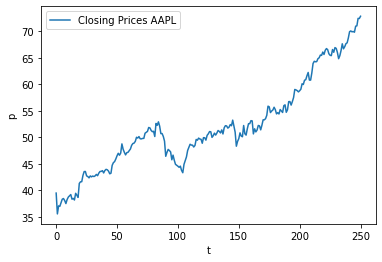

In [59]:
plt.plot(p_cl)
plt.xlabel('t')
plt.ylabel('p')
plt.legend(["Closing Prices AAPL"])

Τώρα θα πάρουμε τις αποδόσεις και τις λογαριθμικές αποδόσεις

In [60]:
r=p_cl.diff ()            # diff is the difference operator acting on the series p
log_r=np.log(p_cl).diff()  # np.log first takes the log of the series and then the diff operator

In [61]:
type(p_cl)
type(r)

pandas.core.series.Series

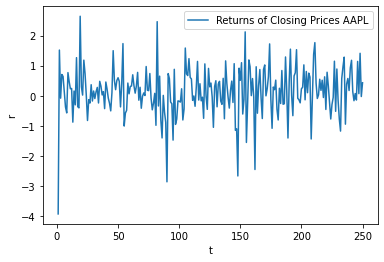

In [62]:
plt.plot(r)
plt.xlabel('t')
plt.ylabel('r')
plt.legend(["Returns of Closing Prices AAPL"])

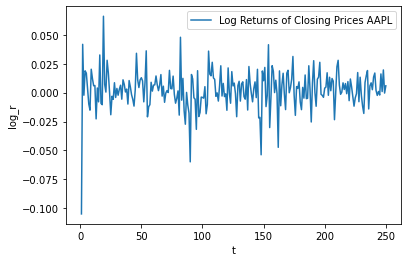

In [63]:
plt.plot(log_r)
plt.xlabel('t')
plt.ylabel('log_r')
plt.legend(["Log Returns of Closing Prices AAPL"])

In [64]:
r

0           NaN
1     -3.932499
2      1.517498
3     -0.082500
4      0.705002
         ...   
246    1.139999
247    0.067497
248    1.410004
249   -0.027504
250    0.430000
Name: Close, Length: 251, dtype: float64

In [65]:
r=r.dropna()     # to eliminate the NaN
r

1     -3.932499
2      1.517498
3     -0.082500
4      0.705002
5      0.639999
         ...   
246    1.139999
247    0.067497
248    1.410004
249   -0.027504
250    0.430000
Name: Close, Length: 250, dtype: float64

In [66]:
log_r

0           NaN
1     -0.104924
2      0.041803
3     -0.002228
4      0.018884
         ...   
246    0.016187
247    0.000950
248    0.019646
249   -0.000380
250    0.005918
Name: Close, Length: 251, dtype: float64

In [67]:
log_r=log_r.dropna()    # to eliminate the Nan
log_r

1     -0.104924
2      0.041803
3     -0.002228
4      0.018884
5      0.016839
         ...   
246    0.016187
247    0.000950
248    0.019646
249   -0.000380
250    0.005918
Name: Close, Length: 250, dtype: float64

(array([ 1.,  2.,  1.,  5., 22., 79., 86., 41., 10.,  3.]),
 array([-3.93249893, -3.27499886, -2.61749878, -1.9599987 , -1.30249863,
        -0.64499855,  0.01250153,  0.6700016 ,  1.32750168,  1.98500175,
         2.64250183]),
 <BarContainer object of 10 artists>)

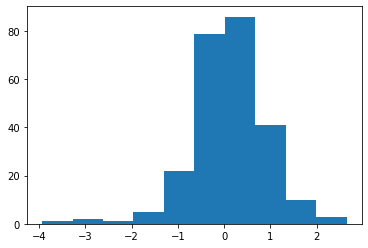

In [14]:
plt.hist(r)

(array([  1.,   0.,   2.,   1.,  13.,  66., 122.,  37.,   7.,   1.]),
 array([-0.10492436, -0.08782181, -0.07071927, -0.05361673, -0.03651419,
        -0.01941165, -0.00230911,  0.01479343,  0.03189598,  0.04899852,
         0.06610106]),
 <BarContainer object of 10 artists>)

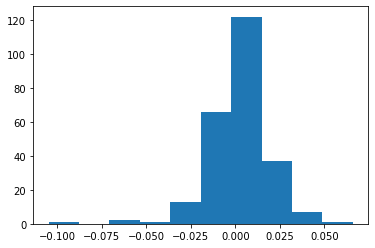

In [15]:
plt.hist(log_r)

# Ελεγχος κανονικότητας των δεδομένων

1. QQ plots

In [68]:
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot



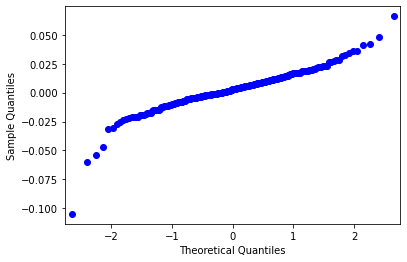

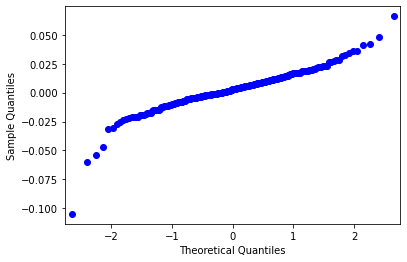

In [69]:
qqplot(log_r)

Βλεπουμε οτι υπάρχουν αποκλίσεις απο την κανονικότητα λόγω κάποιων ακραίων παρατηρήσεων.
Ας προσπαθήσουμε τώρα να αποκόψουμε (truncate) αυτές τις ακραίες τιμές απο τα δεδομένα μας

In [18]:
# this function takes a dataset that is a pandas series and truncates it
# keeping only the values in the interval [-a_trunc,a_trunc]

def data_truncation(data,a_trunc):
    data_1=data[data>-a_trunc]
    data_trunc=data_1[data_1<a_trunc]
    return data_trunc


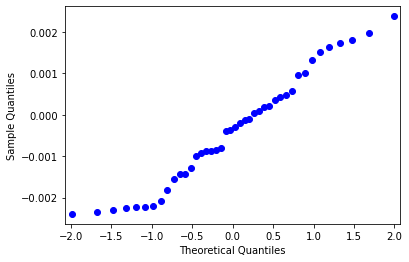

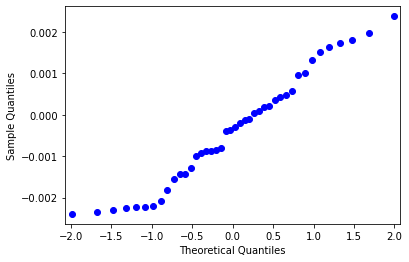

In [19]:
log_r_trunc=data_truncation(log_r,0.0025)
qqplot(log_r_trunc)

2. Shapiro-Wilkes test,  D'Agostino K^2 test, Anderson-Darling

Θα φτιάξουμε  συνάρτησεις οι οποίες να υλοποιούν τους ελεγχούς αυτούς

In [20]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro        # Shapiro Wilkes test 
from scipy.stats import normaltest    # D'Agostino K^2 test
from scipy.stats import anderson       # Anderson - Darling test (similar to Kolmogorov Smirnov)




In [21]:
def my_shapiro(data,alpha=0.05):                 # this is the default value we set for signigicance - user may change
    from scipy.stats import shapiro              # just to make sure we do not forget it!
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
   # interpret
    alpha = 0.05
    if p > alpha:
      print('Sample looks Gaussian (fail to reject H0)')
    else:
      print('Sample does not look Gaussian (reject H0)')
    
    
def my_agostino(data,alpha=0.05):
    from scipy.stats import normaltest          # just to make sure we do not forget it!
    # normality test
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
       print('Sample looks Gaussian (fail to reject H0)')
    else:
       print('Sample does not look Gaussian (reject H0)')
    

def my_anderson(data):
    from scipy.stats import anderson    # just to make sure we do not forget it!
    # normality test
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
          print('%.1f pc: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
          print('%.1f pc: %.3f, data does not look normal (reject H0)' % (sl, cv))    
    


Αρχικά το δοκιμάζουμε σε συνθετικά δεδομένα

In [22]:
from numpy.random import poisson
#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data_poisson = poisson(5, 100)

# generate dataset of 100 values that follow normal distribution with mean 1
data_normal = 2 * randn(100) + 1



In [23]:
my_shapiro(data_normal)
my_shapiro(data_poisson)

Statistics=0.990, p=0.643
Sample looks Gaussian (fail to reject H0)
Statistics=0.958, p=0.003
Sample does not look Gaussian (reject H0)


In [24]:
my_agostino(data_normal)
my_agostino(data_poisson)

Statistics=0.178, p=0.915
Sample looks Gaussian (fail to reject H0)
Statistics=5.625, p=0.060
Sample looks Gaussian (fail to reject H0)


In [25]:
my_anderson(data_normal)
my_anderson(data_poisson)

Statistic: 0.302
15.0 pc: 0.555, data looks normal (fail to reject H0)
10.0 pc: 0.632, data looks normal (fail to reject H0)
5.0 pc: 0.759, data looks normal (fail to reject H0)
2.5 pc: 0.885, data looks normal (fail to reject H0)
1.0 pc: 1.053, data looks normal (fail to reject H0)
Statistic: 1.226
15.0 pc: 0.555, data does not look normal (reject H0)
10.0 pc: 0.632, data does not look normal (reject H0)
5.0 pc: 0.759, data does not look normal (reject H0)
2.5 pc: 0.885, data does not look normal (reject H0)
1.0 pc: 1.053, data does not look normal (reject H0)


Τώρα θα δοκιμάσουμε τους ελέγχους αυτούς στα δεδομένα μας

In [26]:
my_shapiro(log_r)

Statistics=0.913, p=0.000
Sample does not look Gaussian (reject H0)


In [27]:
# Ο έλεγχος δεν περνάει για τα πλήρη δεδομένα. Θα δοκιμάσουμε τώρα για τα truncated δεδομένα

In [28]:
my_shapiro(log_r_trunc)

Statistics=0.954, p=0.092
Sample looks Gaussian (fail to reject H0)


In [29]:
my_agostino(log_r)

Statistics=86.143, p=0.000
Sample does not look Gaussian (reject H0)


In [30]:
# Ο έλεγχος δεν περνάει για τα πλήρη δεδομένα. Θα δοκιμάσουμε τώρα για τα truncated δεδομένα

In [31]:
my_agostino(log_r_trunc)

Statistics=3.837, p=0.147
Sample looks Gaussian (fail to reject H0)


In [32]:
my_anderson(log_r)

Statistic: 3.095
15.0 pc: 0.567, data does not look normal (reject H0)
10.0 pc: 0.646, data does not look normal (reject H0)
5.0 pc: 0.775, data does not look normal (reject H0)
2.5 pc: 0.904, data does not look normal (reject H0)
1.0 pc: 1.075, data does not look normal (reject H0)


Ο έλεγχος δεν περνάει για τα πλήρη δεδομένα. Θα δοκιμάσουμε τώρα για τα truncated δεδομένα

In [33]:
my_anderson(log_r_trunc)

Statistic: 0.452
15.0 pc: 0.533, data looks normal (fail to reject H0)
10.0 pc: 0.607, data looks normal (fail to reject H0)
5.0 pc: 0.728, data looks normal (fail to reject H0)
2.5 pc: 0.849, data looks normal (fail to reject H0)
1.0 pc: 1.010, data looks normal (fail to reject H0)


Aggregate Gaussianity

Ενας εναλλακτικός τρόπος να δοκιμάσουμε αν έχουμε κανονικότητα είναι
αλλάζοντας τις χρονικές κλίμακες για τις οποίες υπολογίζουμε τις αποδόσεις
π.χ. απο ημερήσιες σε εβδομαδιάιες , σε μηνιαίες κλπ.

In [34]:
start=dt.datetime(2018, 1, 2)
end=dt.datetime(2021, 12, 31)
tick='AAPL'
# prices_1 = data.DataReader(tick, 'yahoo', start, end)
yfin.pdr_override()
prices_1 = dtr.get_data_yahoo(tick,start,end)
p_1=prices_1['Close']
log_r_daily=np.log(p_1).diff()   # daily log returns - default in diff function is 1
log_r_daily=log_r_daily.dropna()  # drop the NaN values
log_r_weekly=np.log(p_1).diff(periods=5)  # weekly log returns -- choose periods=5 days in working week
log_r_weekly=log_r_weekly.dropna()  # drop the NaN values
log_r_monthly=np.log(p_1).diff(periods=20)  # monthly log returns -- choose periods=20 days in working month
log_r_monthly=log_r_monthly.dropna()  # drop the NaN values

[*********************100%***********************]  1 of 1 completed


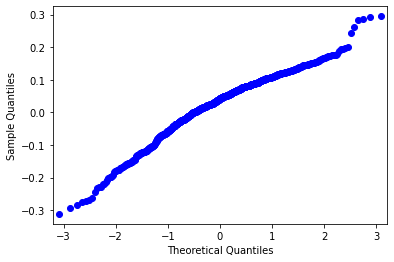

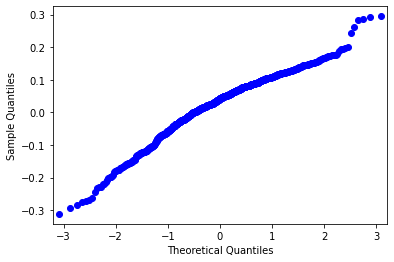

In [35]:
qqplot(log_r_monthly)

In [36]:
my_shapiro(log_r_daily)
my_shapiro(log_r_weekly)
my_shapiro(log_r_monthly)

Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.971, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.963, p=0.000
Sample does not look Gaussian (reject H0)


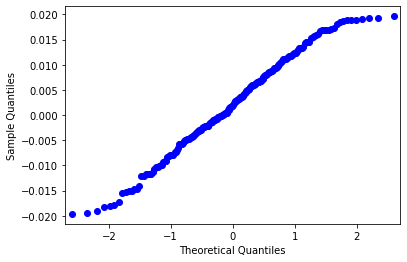

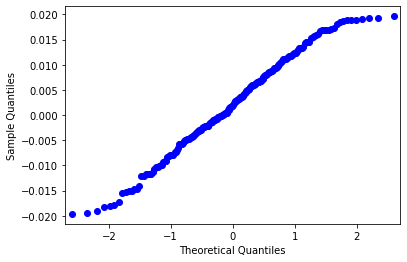

In [37]:
log_r_monthly_trunc=data_truncation(log_r,0.02)
qqplot(log_r_monthly_trunc)

In [38]:
my_shapiro(log_r_monthly_trunc)
my_agostino(log_r_monthly_trunc)
my_anderson(log_r_monthly_trunc)

Statistics=0.983, p=0.013
Sample does not look Gaussian (reject H0)
Statistics=7.818, p=0.020
Sample does not look Gaussian (reject H0)
Statistic: 0.504
15.0 pc: 0.566, data looks normal (fail to reject H0)
10.0 pc: 0.644, data looks normal (fail to reject H0)
5.0 pc: 0.773, data looks normal (fail to reject H0)
2.5 pc: 0.901, data looks normal (fail to reject H0)
1.0 pc: 1.072, data looks normal (fail to reject H0)


# Autocorrelation function

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


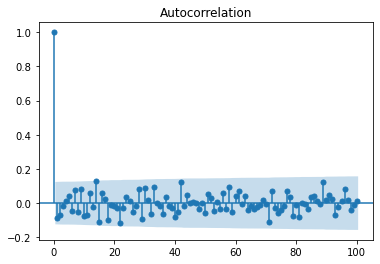

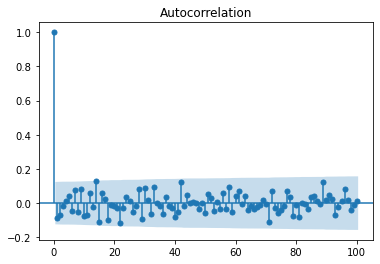

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_r, lags=100)

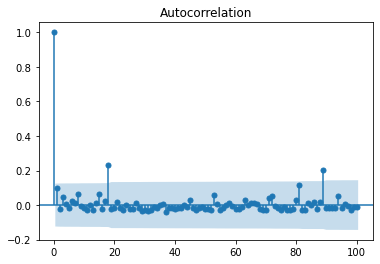

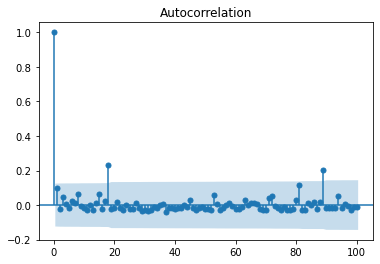

In [40]:
plot_acf(log_r**2, lags=100)

Stationarity Tests

Ενα διαδεδομένο test στασιμότητας είναι ο έλεγχος Dickey Fuller ή ο επαυξημένος έλεγχος Dickey Fuller (ADF).
Πολύ συνοπτικά ο έλεγχος Dickey-Fuller βασίζεται στο υπόδειγμα  

$$ y_{t} = a y_{t-1} + \epsilon_t $$

όπου $\epsilon_t \sim_{i i d}$.

Το μοντέλο αυτό είναι στάσιμο αν $|a| <1$ και μη στάσιμο αν $|a|=1$ (μοναδιαία ρίζα - unit root).

Η μηδενική υπόθεση του DF test είναι 

$H_0$: Υπαρξη μοναδιαίας ρίζας

Αν η $p$-value είναι μικρότερη απο το επίπεδο εμπιστοσύνης (π.χ. το 0.05) απορρίπτουμε την μηδενική υπόθεση και μπορουμε να υποθέσουμε στασιμότητα της χρονολογικής σειράς

Αν η $p$-value είναι μεγαλύτερη δεν μπορούμε να απορρίψουμε την μηδενική υπόθεση.

Εναλλακτικά όσο μικρότερη τιμή έχει η ADF statistic τόσο περισσότερες ενδείξεις έχουμε για να απορρίψουμε την μηδενική υπόθεση.



Αρχικά θα δοκιμάσουμε το τεστ σε προσομοιωμένα δεδομένα

In [41]:
def my_dickey_fuller(data):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [42]:
my_dickey_fuller(data_normal)

ADF Statistic: -6.883493
p-value: 0.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [43]:
my_dickey_fuller(data_poisson)

ADF Statistic: -5.479258
p-value: 0.000002
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583


Τα παραπάνω αποτελέσματα μας δίνουν ένδειξεις στασιμότητας

Θα παραγουμε τώρα προσομοιωμένα δεδομένα απο χρονολογικές σειρές και θα εφαρμόσουμε σε αυτά τους παραπάνω ελέγχους

In [44]:
def my_unit_root_data(n):
    data_unit_root=np.zeros(n)
    data_unit_root[0]=0
    for i in range(n):
        data_unit_root[i]=data_unit_root[i-1]+randn()
    return data_unit_root



def my_time_series_data(alpha,n):
    data_time_series=np.zeros(n)
    data_time_series[0]=0
    for i in range(n):
        data_time_series[i]=alpha*data_time_series[i-1]+randn()
    return data_time_series


Τρέχουμε τις παραπάνω συναρτήσεις για να παράγουμε τα δεδομένα

In [45]:
data_unit_root=my_unit_root_data(100)

data_time_series=my_time_series_data(0.1,100)

data_unit_root_large=my_unit_root_data(1000)

data_time_series_large=my_time_series_data(0.1,1000)

In [46]:
my_dickey_fuller(data_unit_root)

ADF Statistic: -1.381194
p-value: 0.591258
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [47]:
my_dickey_fuller(data_time_series)

ADF Statistic: -9.579462
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [48]:
my_dickey_fuller(data_unit_root_large)

ADF Statistic: -1.328778
p-value: 0.615906
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [49]:
my_dickey_fuller(data_time_series_large)

ADF Statistic: -27.656541
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Τώρα θα δοκιμάσουμε το test σε δεδομένα απο τις αποδόσεις μετοχών

In [50]:
my_dickey_fuller(log_r)

ADF Statistic: -12.431618
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Τα παραπάνω αποτελέσματα μας ενθαρρύνουν να απορρίψουμε την μηδενική υπόθεση και να θεωρήσουμε στασιμότητα

In [51]:
my_dickey_fuller(r)

ADF Statistic: -12.416251
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [52]:
p_cl=prices['Close']

In [53]:
my_dickey_fuller(p_cl)

ADF Statistic: 0.561759
p-value: 0.986634
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


Σε αντίθεση με το τι συμβαίνει με τις αποδόσεις, οι ίδιες οι τιμές δεν μπορεί να θεωρηθούν στάσιμες